**SPRINT 8**

*Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.*

*Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.*

En los siguentes ejercicios, los nombres de algunos dataframe son bastante largos, pero es para que quedara claro cuáles eran las tablas que se están usando. 

Importamos todas las librerias necesarias

In [10]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squarify


Realizamos la conexión con MySql

In [11]:

# Función para establecer la conexión con la base de datos
def conexion_DB():
    try:
        conexion = mysql.connector.connect(
            host='localhost',
            port=3306,
            user='root',
            password='AirMax.1',
            database='transas'
        )
        if conexion.is_connected():
            print('Conexión existosa')
            return conexion
    except mysql.connector.Error as e:
        print('Error durante la conexión:', e)
        return None

# Función para cargar una tabla específica desde la base de datos utilizando cursor
def cargar_tabla(tabla):
    conexion = conexion_DB()
    if conexion is not None:
        try:
            cursor = conexion.cursor()
            query = f"SELECT * FROM {tabla}"
            cursor.execute(query)
            # Obtener los resultados de la consulta
            resultados = cursor.fetchall()
            # Convertir los resultados en un DataFrame
            df = pd.DataFrame(resultados, columns=[i[0] for i in cursor.description])
            cursor.close()
            return df
        except mysql.connector.Error as ex:
            print(f'Error al cargar la tabla {tabla}:', ex)
            return None
        finally:
            conexion.close()
    else:
        return None








Cargamos todas las tablas

In [12]:

df_transactions = cargar_tabla('transactions')
df_users = cargar_tabla('users')
df_products = cargar_tabla('products')
df_products_transactions = cargar_tabla('products_transactions')
df_companies = cargar_tabla('companies')
df_credit_card_status = cargar_tabla('credit_card_status')
df_credit_cards = cargar_tabla('credit_cards')

Conexión existosa
Conexión existosa
Conexión existosa
Conexión existosa
Conexión existosa
Conexión existosa
Conexión existosa


A continuación mostraremos que la información de las tablas de nuestra Base de Datos para saber con que tipos de datos estamos trabajando

In [13]:
print(f'Tabla: df_transactions')
df_transactions.info()
print(f'Tabla: df_users')
df_users.info()
print(f'Tabla: df_companies')
df_companies.info()
print(f'Tabla: df_products')
df_products.info()
print(f'Tabla: df_credit_cards')
df_credit_cards.info()
print(f'Tabla: df_credit_card_status')
df_credit_card_status.info()
print(f'Tabla: df_products_transactions')
df_products_transactions.info()

Tabla: df_transactions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          587 non-null    object        
 1   card_id     587 non-null    object        
 2   company_id  587 non-null    object        
 3   timestamp   587 non-null    datetime64[ns]
 4   amount      587 non-null    float64       
 5   declined    587 non-null    int64         
 6   user_id     587 non-null    object        
 7   lat         587 non-null    float64       
 8   longitude   587 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 41.4+ KB
Tabla: df_users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           275 non-null    object
 1   name         2

**NIVELL 1**

**Exercici 1**

*Una variable numèrica.*

Se ha escogido un histograma ya que solo se trabaja con una variable numérica, la empresa necesita saber la cantidad de transacciones que se han realizado.

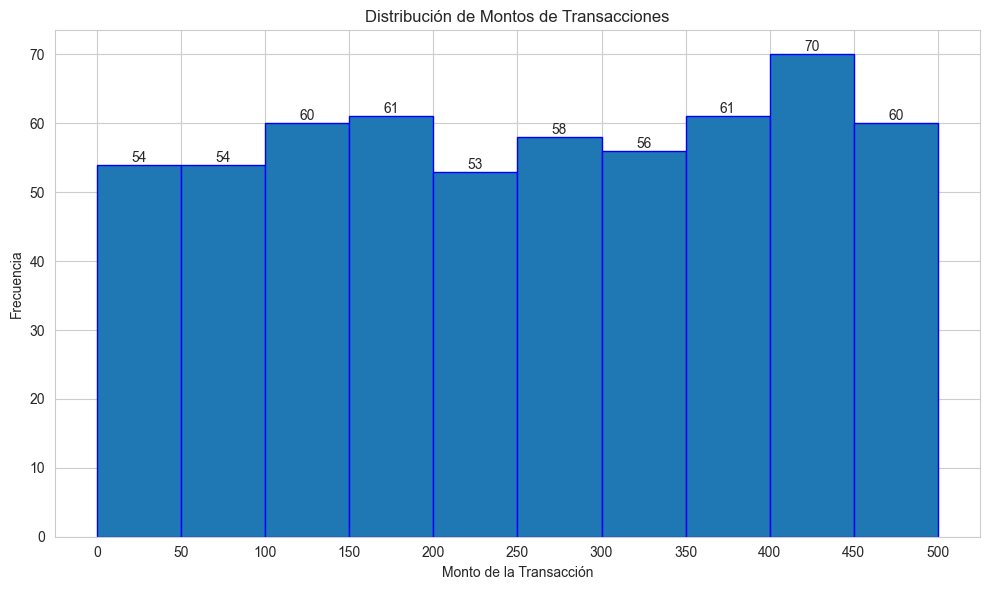

In [14]:
df_transactions['amount']

# Creamos el histograma
sns.set_style('whitegrid') # Poner el fondo blanco y con rejilla
plt.figure(figsize=(10, 6)) 
values, bins, bars = plt.hist(df_transactions['amount'], bins=np.arange(0, 525, 50), edgecolor="blue")
plt.xticks(bins)
plt.title('Distribución de Montos de Transacciones') 
plt.xlabel('Monto de la Transacción')
plt.ylabel('Frecuencia')
plt.bar_label(container=bars)
plt.tight_layout()

plt.show()


*El histograma de los montos de las transacciones nos muestra cómo están distribuidos los diferentes valores. Con esto, podemos ver si hay montos que se repiten mucho o si hay algunos muy raros. Básicamente, nos da una idea de qué tan variados son los montos y nos ayuda a entender mejor los datos para saber qué investigar después. Tenemos en el eje X el monto de las transacciones y en el eje Y la frecuencia, es decir las veces que se han hecho transacciones por ese valor*

*Aunque en lineas generales el gráfico es bastante uniforme, se podrían sacar las siguientes conclusiones:*

*Como se puede observar la mayor frecuencia ha sido de 70, y la más baja de 53. Se puede ver que la mayoría de las barras se mueve en frecuencias entre 50 y 60. Se podría decir que en los rangos del monto de la transacción que se mueven entre 20 y 100 han sido donde más transacciones se han hecho y también en el rango de 350 a 500.*

**EXERCICI 2**

*Dues variables numèriques.*

Se ha escogido un gráfico de dispersión, ya que la empresa necesita saber la relación que hay entre el peso y el precio de los productos y concretamente en los productos que tienen un precio de más de 100 y un peso de más de 2.5

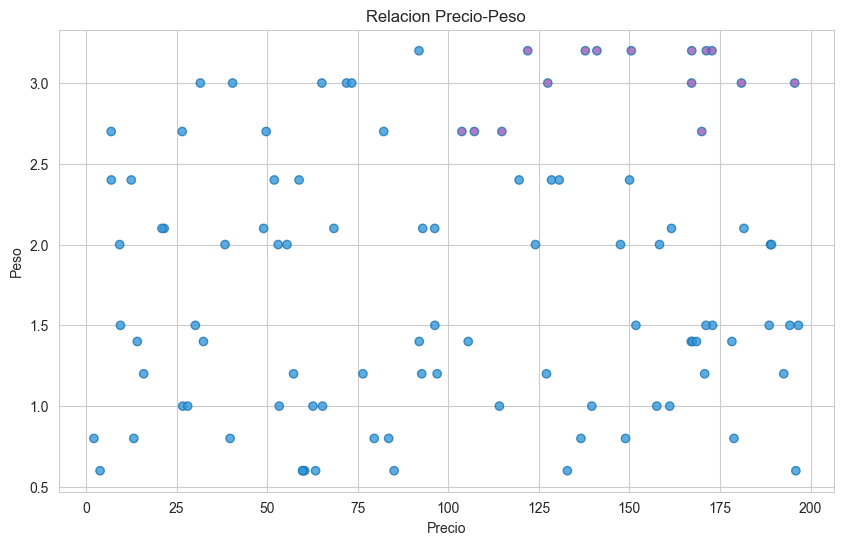

In [15]:
plt.figure(figsize=(10, 6))

#las dos línias de código a continuación nos sirve para filtrar los productos de color morado que es los que quiere identificar la empresa
value=(df_products['price']>100) & (df_products['weight']>2.5)
df_products['color']= np.where( value==True , "#9b59b6", "#3498db")

# Creamos el gráfico de dispersión
sns.regplot(data=df_products, x="price", y="weight", fit_reg=False, scatter_kws={'facecolors':df_products['color']})
plt.title('Relacion Precio-Peso')
plt.xlabel('Precio')
plt.ylabel('Peso')
plt.show()



*El gráfico proporcionado es un gráfico de dispersión que muestra la relación entre el precio (en el eje x) y el peso (en el eje y).* 

*El precio se encuentra en el rango de 0 a 200 y el peso se encuentra en el rango de 0.5 a 3.5.*

*Como extra, la empresa nos ha pedido que remarquemos los productos que tengan un precio superior a 100 y un peso de más de 2.5 para poder tenerlos mejor controlados*

*Los puntos están distribuidos de manera bastante uniforme a lo largo de todo el rango de precios y pesos.*

*En este caso, muestra que no hay una relación evidente entre el precio y el peso. Hemos escogido este tipo de gráfico ya que ayuda a identificar rápidamente la existencia de cualquier correlación o patrón entre las variables.* 

*Este gráfico vendría bien a la empresa para poder gestionar la paquetería o para recalcular los precios de los productos según su peso, ya que en el caso de que se tuvieran que enviar esos productos poder reducir el coste del envío.*

**EXERCICI 3**

*Una variable categòrica.*

Se ha escogido un gráfico de barras ya que solo es una variable categórica y la empresa necesita saber que compañías han realizado el mayor número de transacciones

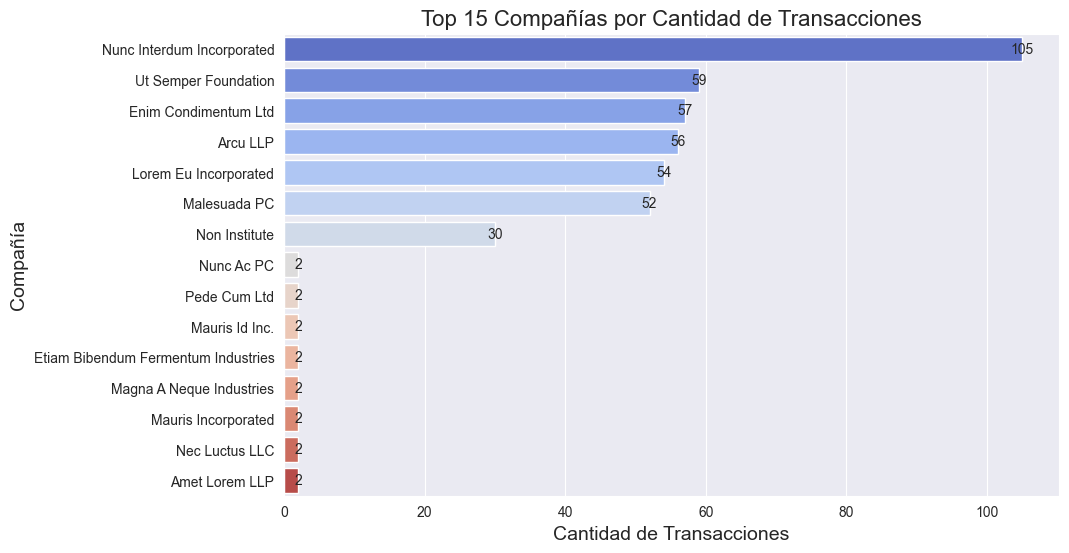

In [16]:

# Contar el número de transacciones por cada compañía y en el reset index renombramos la columna del count por cantidad_transacciones
transacciones_por_compania = df_transactions['company_id'].value_counts().reset_index(name='cantidad_transacciones')
# Unir la columna creada
df_company_count= pd.merge(df_companies,transacciones_por_compania,left_on='id', right_on='company_id')
# Seleccionar las columnas que queremos del merge
df_company_count = df_company_count[['company_name', 'cantidad_transacciones']]
# Ordenar por cantidad_transacciones en orden descendente y que muestre solo las 15 primeras compañias
df_company_count = df_company_count.sort_values(by='cantidad_transacciones', ascending=False).head(15)


sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
# Para poder crear el gráfico horizontal, primero se tiene que poner la variable "Y" para después poner la variable "X"
sns.barplot(data=df_company_count, y='company_name', x='cantidad_transacciones', palette="coolwarm", hue='company_name', legend=False)
plt.title('Top 15 Compañías por Cantidad de Transacciones', fontsize=16)
plt.xlabel('Cantidad de Transacciones', fontsize=14)
plt.ylabel('Compañía', fontsize=14)

# Sirve para poder añadir los números a las barras
for index, value in enumerate(df_company_count['cantidad_transacciones']):
    plt.text(value, index, str(value), fontsize=10, ha='center', va='center')

plt.show()

*Hemos optado por un gráfico de barras horizontales para destacar las 15 principales compañías según el número de transacciones, ya que a partir de la séptima compañía, todas tienen pocas transacciones, lo que hace que su visualización sea menos relevante en comparación con las principales.*

*Se ha escogido este tipo de gráfico porque nos muestra de manera clara y concisa el top 15 de empresas que más transacciones realizan*

*No se ha tenido en cuenta las transacciones declinadas, simplemente se ha realizado un estudio de todas las transacciones.*

*Como se puede ver, "Nunc Interdum Incorporated" es la compañía que más transacciones ha realizado con una gran diferencia respecto a las demás, resalta, que una empresa tenga casi el doble de transacciones que la segunda que más transacciones realiza. Por otro lado, cabe decir que las 5 siguientes empreses han hecho un nivel de transacciones similar entre 50 y 60.*

*Añadir, que las demás empresas solo han realizado 2 trnsacciones*

*Esta información sería de utilidad para la empresa en el caso de que quieran reforzar lazos con la compañía que más le compra y también para generar campañas para incentivar las compras de las empresas que tienen pocas transacciones*

**EXERCICI 4**

*Una variable categòrica i una numèrica.*

Se ha escogido un boxplot ya que el gráfico consta de na variable categórica y otra numérica. La empresa quiere saber cuanto se ha gastado por país

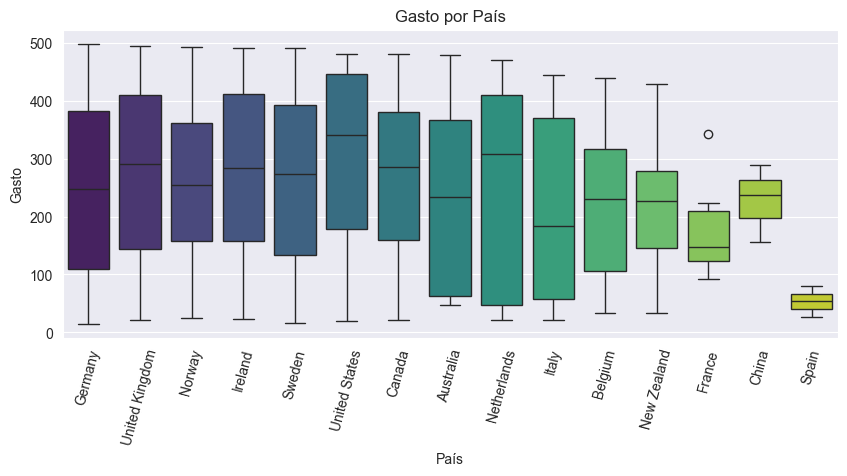

In [17]:
# Unimos las tablas transactions y companies
df_merge_trans_companies= pd.merge(df_transactions,df_companies, left_on= 'company_id', right_on= 'id', suffixes=('_transaction', '_companies'))
# Seleccionar las columnas
df_merge_trans_companies_filter = df_merge_trans_companies[['country', 'amount']]
# Ordenar por 'amount' en orden descendente
df_merge_trans_companies_filter = df_merge_trans_companies_filter.sort_values(by='amount', ascending=False)

# Crear el gráfico boxplot
sns.set_style('darkgrid')
plt.figure(figsize=(10,4))
sns.boxplot(data=df_merge_trans_companies_filter, x='country', y='amount', hue= 'country', legend=False, palette='viridis')
plt.xlabel('País')
plt.ylabel('Gasto')
plt.title('Gasto por País')
plt.xticks(rotation=75)# Inclinar un poquito los nombres del eje 'x'
plt.show()


*El eje x representa diferentes países y el eje y representa el gasto, con un rango que va de 0 a 500.*

*-Gasto más alto: Países como Países Bajos, Alemania, Reino Unido, Noruega, Irlanda y Suecia tienen un gasto relativamente alto, con medianas alrededor de 300 o más.*

*-Gasto más bajo: España, China y Francia tienen un gasto notablemente menor en comparación con otros países.*

*-Dispersión del Gasto: Países como Estados Unidos, Canadá, Australia y los Países Bajos muestran una amplia dispersión en sus datos de gasto, indicando una mayor variabilidad.*

*-Outliers: Francia tiene un valor atípico que se destaca, indicando que hay un gasto significativamente mayor que el resto de los datos en ese país.*

*Se puede observar que Italia tiene una mediana con tendencia al primer cuartil aún gastando bastante, esto podría denotar que tiene una dispersión en los datos. En el caso de Países Bajos tambíen pasa pero con la mediana con tendencia hacía el tercer cuartil, batante por encima del resto de países.*

*A la empresa le íria bien reforzar el impacto de marketing en países como China, España o Francia ya que el impacto en el gráfico es muy pequeño*

*El 'Boxplot' es un gráfico eficaz para comparar la distribución del gasto entre diferentes países, proporcionando una visión clara de la centralidad, dispersión y posibles valores atípicos en los datos.*

**EXERCICI 5**

*Dues variables categòriques.*

Se ha escogido un treemap ya que son dos variables categóricas y la empresa quiere saber cuáles son sus productos más existosos

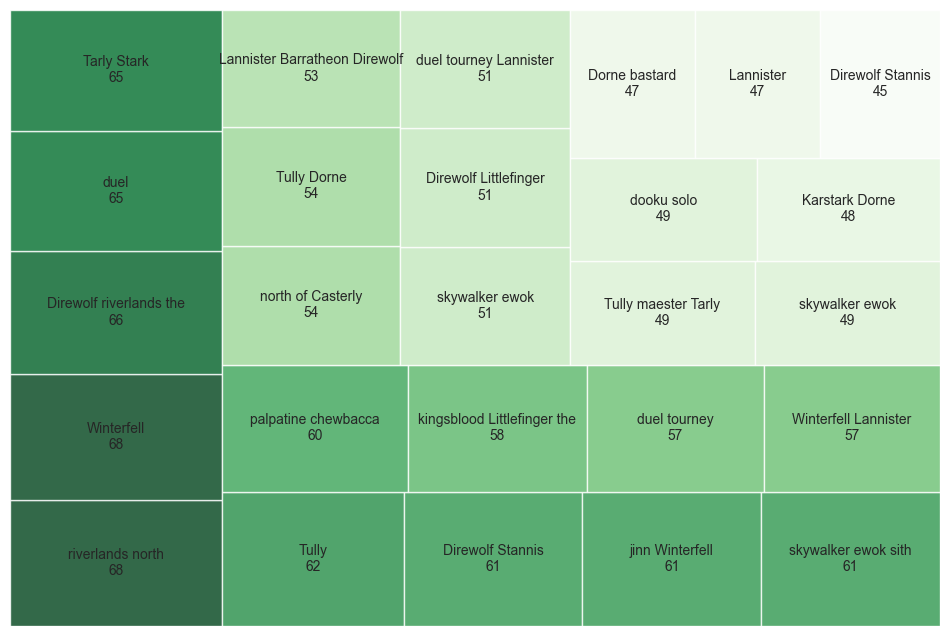

In [18]:

# Unir las tablas de products y products_transactions
df_merge_products_pt = pd.merge(df_products, df_products_transactions, left_on='id', right_on='product_id',suffixes=('_products', '_pt'))
# Contar la cantidad de productos comprados
best_products = df_merge_products_pt['product_id'].value_counts().reset_index(name='cantidad_productos_comprados')
# Hacer un merge con la tabla best_products para obtener los nombres de los productos
df_best_products = pd.merge(df_products, best_products, left_on= 'id', right_on='product_id')
# Seleccionar las columnas 
df_best_products = df_best_products[['product_name', 'cantidad_productos_comprados']]
# Ordenar por la cantidad de productos comprados en orden descendente 
df_best_products = df_best_products.sort_values(by='cantidad_productos_comprados', ascending=False)

# Creación del Treemap
cmap = plt.cm.Greens
mini = min(df_best_products['cantidad_productos_comprados'])
maxi = max(df_best_products['cantidad_productos_comprados'])
norm = plt.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df_best_products['cantidad_productos_comprados']]
plt.figure(figsize=(12, 8))
squarify.plot(sizes=df_best_products['cantidad_productos_comprados'], alpha=.8, color=colors, 
              label=df_best_products['product_name']+ "\n" + df_best_products['cantidad_productos_comprados'].astype(str))
plt.axis('off')
plt.show()



*El uso del treemap es beneficioso porque permite visualizar fácilmente la distribución de las ventas entre los productos principales. La diferencia de tamaño entre los cuadrados facilita la comparación visual de la popularidad de cada producto, lo que ayuda a identificar rápidamente los productos más importantes en términos de ventas.*

*Para esta tarea, hemos optado por un gráfico 'Treemap'. Se han contabilizado los productos que se han comprado a través de su id, para después mostrar el nombre de esos productos. Hemos elegdo el 'Treemap' porque refleja de una manera clara que productos han sido los más vendidos "revierlands north" y "Winterfell"  en la esquina inferior izquierda y que producto ha sido el menos vendido "Direwolf Stannis" en la esquina superior derecha.*

*El tamaño de cada cuadrado representa la proporción de productos comprados en comparación con los otros productos. Las etiquetas dentro de cada cuadrado muestran el nombre del producto y la cantidad de productos comprados.*

*Se puede observar que hay dos productos que se llaman igual "skywalker ewok" y "Direwolf Stannis", la empresa debería ir con cuidado para no confundir en que tipo de producto quiere realizar acciones, sobretodo porque uno de ellos es el artículo menos vendido y quizá tenga que reforzar la publicidad de ese producto, quizá un cambio de nombre sería una buena acción para diferenciarlo* 



**EXERCICI 6**

*Tres variables.*

Hemos escogido un gráfico de burbujas ya que se van a usar tres variables. La empresa quiere saber los nombres de los productos y la relación entre la cantidad de productos vendidos y las ventas.

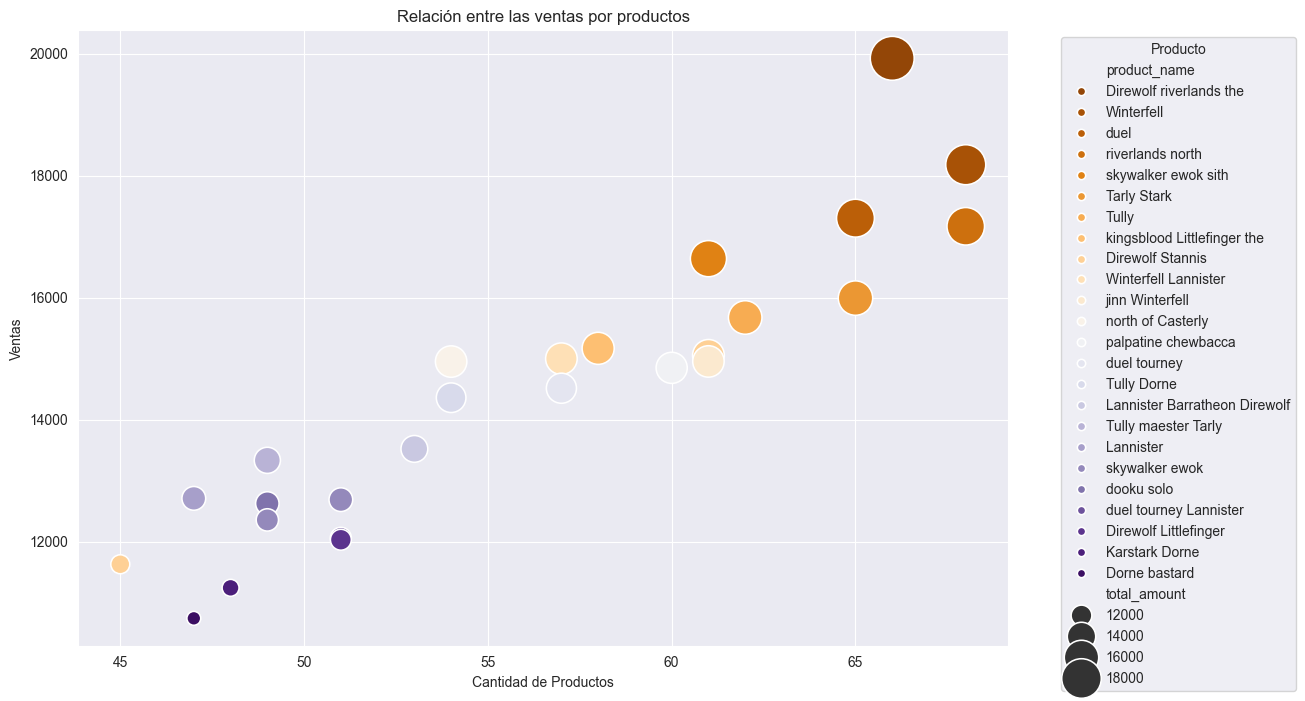

In [19]:

# Unir las tablas de transactions, products_transactions y products
df_merge_transactions_pt = pd.merge(df_transactions, df_products_transactions, left_on='id', right_on='transaction_id')
df_merge_transactions_pt_products = pd.merge(df_merge_transactions_pt, df_products, left_on='product_id', right_on='id', suffixes=('_transactions','_products'))
# Agrupar por product_id y product_name y realizar agregaciones con nombres personalizados
df_agg = df_merge_transactions_pt_products.groupby(['product_id', 'product_name']).agg(
    cantidad_productos=('product_id', 'count'),
    total_amount=('amount', 'sum')
).reset_index()
# Convertir los valores de la columna 'amount' a decimales
df_agg['total_amount'] = df_agg['total_amount'].astype(float)
# Ordenar los productos de manera descendente
df_agg = df_agg.sort_values(by='total_amount', ascending=False)

# Crear el gráfico de burbujas
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_agg, x='cantidad_productos', y='total_amount', size='total_amount', sizes=(100, 1000), hue='product_name', palette='PuOr')
plt.title('Relación entre las ventas por productos')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Ventas')
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



*Hemos querido usar un gráfico de burbujas, este nos muestra en el eje X la cantidad de productos vendidos, y en el eje y las ganancias obtenidas con la cantidad de productos vendidos. Las burbujas son cada tipo de producto, y el size de las burbujas viene relacionado con la cantidad de amount, esto se ve reflejado en la leyenda de la derecha.*

*Como se puede observar, hay una relación entre la cantidad de productos vendidos y el amount generado por estas ventas. Es decir, los productos que más se han comprado, han generado una mayor ganancia.*

*El producto que más se ha vendido ha sido "Direwolf riverlands the" y el que menos "Dorne Bastard", también son los productos que más ganancias y menos ganancias han generado respectivamente.*

*Con estos datos, la empresa puede focalizarse en incentivar la compra de algunos productos que se están vendiendo poco y crear alguna campaña de marketing para que tenga un mayor impacto en los clientes*

*Como se puede observar hay un producto de color amarillo que se encuentra en la zona de los productos que se han comprado menos veces, eso es debido a que se está cogiendo el nombre del producto y hay 2 productos que se llaman igual Direwolf Stannis y skywalker ewok, si hubieramos usado la id en vez del nombre del producto no saldría ese error, pero de todas maneras nos muestra lo que le pedimos, solo que al llamarse igual los colorea igual.*

**EXERCICI 7**

*Graficar un Pairplot.*

Se ha escogido un pairplot para relacionar dos variables numéricas y una categótica. La empresa quiere saber la relación entre el peso y el precio de los productos que compran los users de cada país.

<Figure size 1200x800 with 0 Axes>

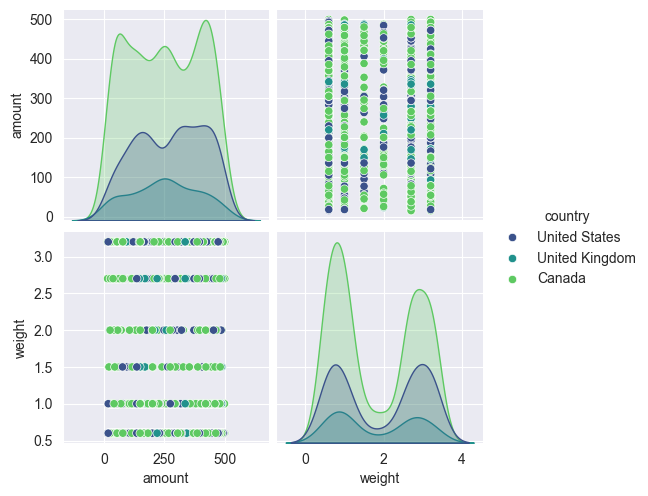

In [24]:
# Unir el merge ya creado con la tabla user
df_merge_transactions_pt_products_users = pd.merge(df_merge_transactions_pt_products, df_users, left_on='user_id', right_on='id',suffixes=('_all','_users'))
# Seleccionar las columnas 
df_filter_merge = df_merge_transactions_pt_products_users[['country', 'amount','weight']]

# Crear el pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(data=df_filter_merge, hue= 'country', palette='viridis')
plt.show()




*Hemos construido un pairplot a través de las 2 variables numéricas (weight y amount) y una variable categórica (country).*

*Se tiene que decir que por la naturaleza de los datos, quizá la información que nos muestra no es muy relevante, pero se pueden realizar pequeñas observaciones*

*El gráfico, nos muestra que Canada es la que más dinero se gastas de los tres países, y en definitiva la que más productos de todos tipos de pesos compra, ya que hay una clara tendencia de color morado en todos los gráficos. También podemos observer que United Kingdom es el país que menos gasta*

*En cuanto a la relación entre el precio y el amount, no se puede observar ninguna tendencia clara, ya que hay productos que pesan mucho y valen poco y viceversa, por lo tanto se podría decir que no existe ningún patrón a destacar.*



**NIVELL 2**

**Exercici 1**

*Correlació de totes les variables numèriques.*

Se ha escogido una matriz ya que se quieren mostrar todas las variables numéricas de la base de datos. La empresa quiere ver si existe una relación entre todas las variables numéricas de la base de datos.

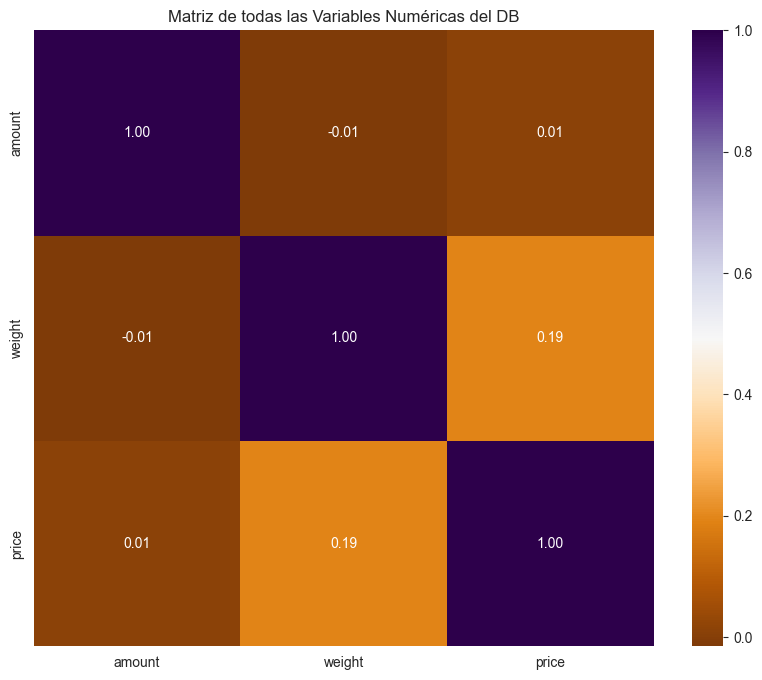

In [21]:
# Elegimos las columnas numéricas
df_merge_transactions_pt_products_heatmap = df_merge_transactions_pt_products[['amount', 'weight','price']]

# Creamos un dataframe números para asegurarnos que coja los float y los int
df_numeros = df_merge_transactions_pt_products_heatmap.select_dtypes(include=['float64', 'int64'])
matriz = df_numeros.corr()

# Crear la matriz
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap='PuOr', fmt='.2f')
plt.title('Matriz de todas las Variables Numéricas del DB')
plt.show()

*Realizamos el heatmap de la matriz de correlación de las variables numéricas, las variables  tienen relación baja entre sí por lo que se observa en el hetmap, por lo que es complicado sacar una conclusión óptima para obtener resultados que sirvan a la empresa.*

**Exercici 2**

*Implementa un jointplot*

Se ha seleccionado un joinplot porque la empresa queire ver la relación entre el precio y la cantidad de productos comprados en un gráfico de dispersión y en un histograma.

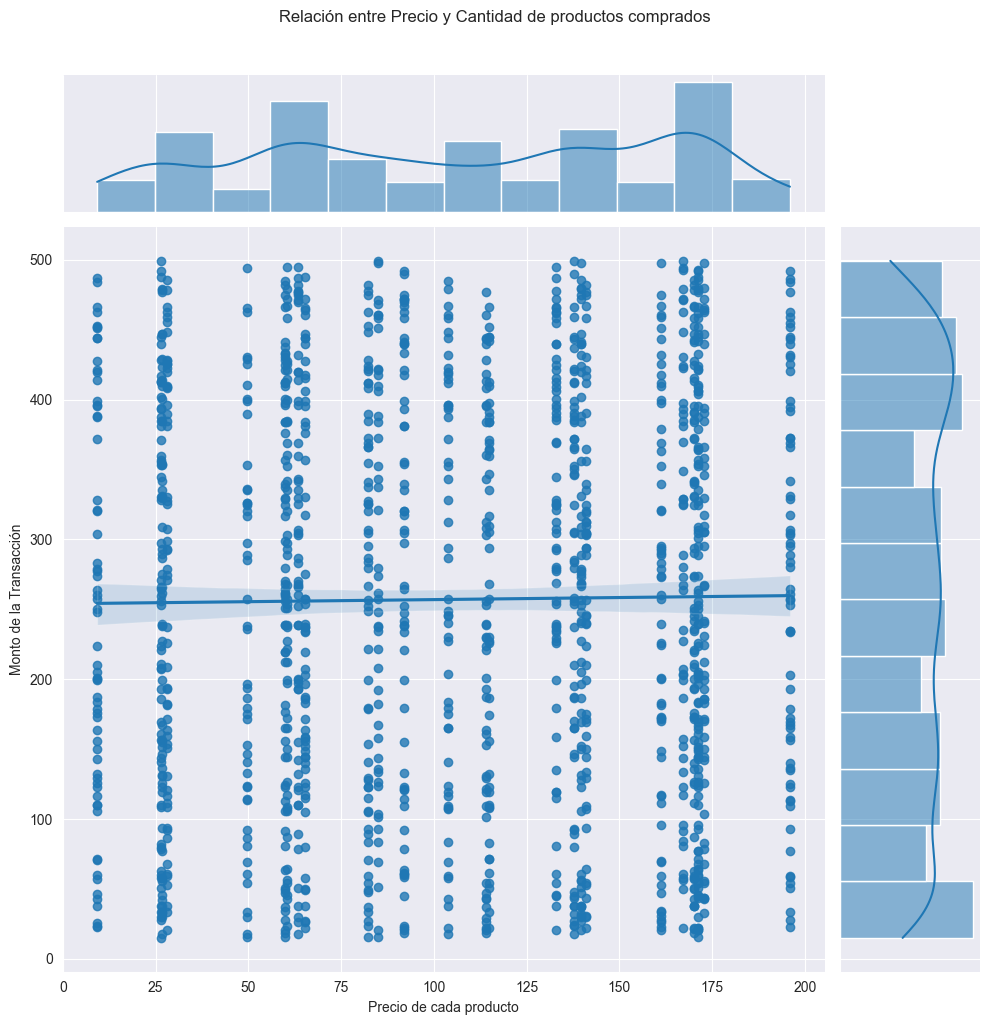

In [22]:
# Seleccionar las columnas de price y amount
df_merge_transactions_pt_products_filter = df_merge_transactions_pt_products[['price', 'amount']]
# Ordenar el DataFrame por el valor de 'amount' en orden descendente
df_merge_transactions_pt_products_order = df_merge_transactions_pt_products_filter.sort_values(by='amount', ascending=False)

# Crear el joinplot
sns.jointplot(x='price', y='amount', data=df_merge_transactions_pt_products_order, kind='reg', height=10)
plt.suptitle('Relación entre Precio y Cantidad de productos comprados', y=1.02)
plt.xlabel('Precio de cada producto')
plt.ylabel('Monto de la Transacción')
plt.tight_layout()
plt.show()

*La empresa nos ha pedido realizar un jointplot, para ver si existe una relación entre el precio y el amount de los productos. Como se puede ver, la dispersión de puntos parece ser bastante uniforme a lo largo de los diferentes valores de precio. Esto sugiere que hay una relación baja entre el precio de los productos y el amount de las transacciones.*

*La línea de regresión casi horizontal refuerza esta observación, mostrando que, en promedio, el amount no varía significativamente con el cambio en el precio de los productos.*

*Como observación, se podría decir que en los precios que están en una franja de 50-75 y 125-175, se ha comrpado más, ya que hay un aacumulación maypr de los puntos*

*El histograma en la parte superior muestra cómo se distribuyen los precios de los productos. Se puede observar si hay precios que son más comunes, como por ejemplo se ve que los productos que más aparecen son los que oscilan en precios entre 160 y 180  así como los que están en un rango entre 55 y 65. Los productos que menos aparecen son los que oscilan entre 30 y 50 o entre 90 y 110*

*Por otro lado, el histograma en la derecha muestra cómo se distribuyen los amounts de las transacciones. Esto puede indicar si la mayoría de las transacciones son de montos bajos, medios o altos. Y aunque la las transacciones entre 10 y 50 es la barra más alta, se puede decir que el amount es bastante uniforme y no hay una tendencia muy clara.*

**NIVELL 3**

**Exercici 1**

*Implementa un violinplot combinat amb un altre tipus de gràfic.*

La empresa quiere un violinplot combinado con un gráfico de dispersión para observar la distribución del amount por el precio de los productos que compran los usuarios de cada país.

C:\Users\Adam\AppData\Local\Temp\ipykernel_13396\94513059.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='price', y='amount', data=df_merge_filtrada, inner=None, ax=ax, palette='PuOr')


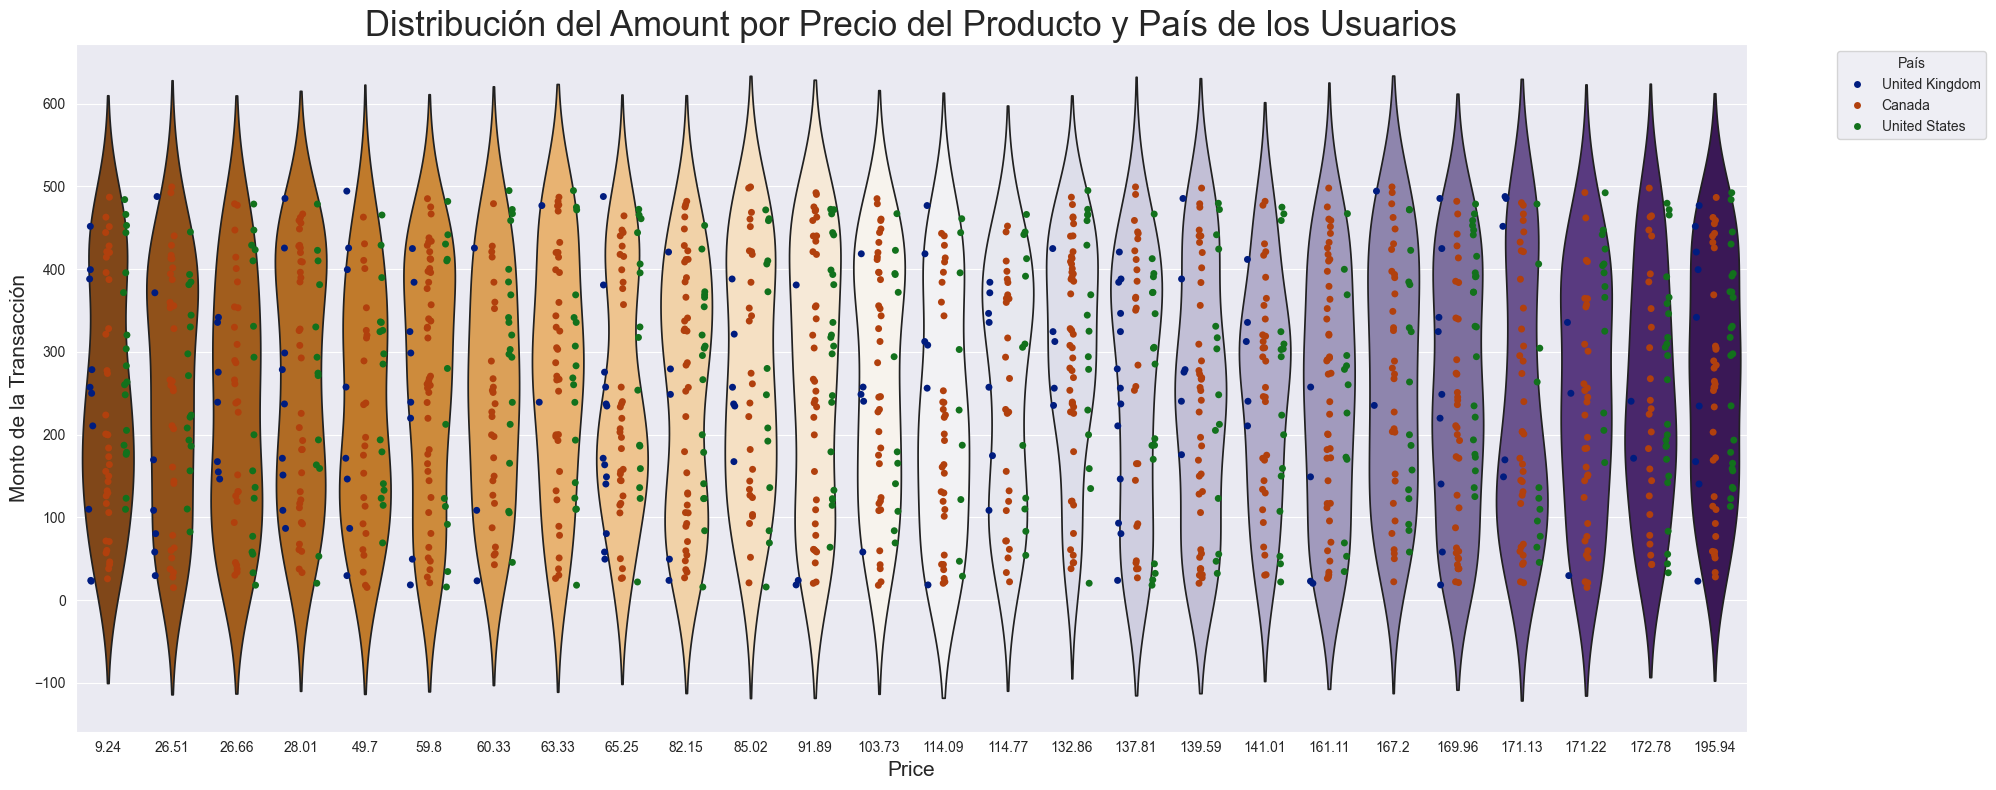

In [23]:
# Seleccionar las columnas de país,precio y amount
df_merge_filtrada = df_merge_transactions_pt_products_users[['country','price', 'amount']]


# Creamos el violinplot
fig, ax = plt.subplots(figsize=(20, 8))
sns.violinplot(x='price', y='amount', data=df_merge_filtrada, inner=None, ax=ax, palette='PuOr')

# Creamos el gráfico de dispersión
sns.stripplot(x='price', y='amount', hue='country', data=df_merge_filtrada, dodge=True, ax=ax, palette='dark')
ax.set_title('Distribución del Amount por Precio del Producto y País de los Usuarios', fontsize= 25)
ax.set_xlabel('Price',fontsize=15)
ax.set_ylabel('Monto de la Transacción',fontsize=15)

# Añadimos una leyenda para los países
plt.legend(title='País', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

*La empresa nos ha pedido combinar un violinplot con otro tipo de gráfico, en este caso, hemos optado por combinarlo con un gráfico de dispersión.*

*El gráfico muestra cómo varía el monto de las transacciones en función del precio del producto y cómo esta relación difiere entre los tres países.*

*La densidad de los montos de transacción para diferentes precios es visualmente clara gracias a los gráficos de violín, mientras que los puntos individuales permiten identificar la distribución y los outliers para cada país.*

*Los puntos dispersos sobre las violines facilitan la comparación directa entre las transacciones de diferentes países para cada precio específico.*

*El gráfico nos muestra que el volumen de usuarios de Canadá es mayoritario, porque predominan los puntos de color naranja.*

*También se puede obsevar que la tendencia a salir del violín suele ser de los usuarios de Estados Unidos y Reino Unido y sobretodo en el prcio de 9.24 los usuarios de ambos países están muy al límite de salirse del violín.*

*Aunque en general la densidad de los violines es bastante uniforme, si que se puede decir que en los precios de 132.86, se estreha más de lo nomral por la parte inferior respecto a los demás. Así como a la inversa pasa con el precio de 171.13.*

